<a href="https://colab.research.google.com/github/casanchez25/crops_densimetric_classifier/blob/main/Cantidad_de_Vueltas_Completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT: Crops Densimetric Classifier
This project is related to the amount of turn arounds that crops should take in a densimetric machine in order to be approved for next processes

The **columns** of this projects refers to:

*   Orden: Order number
*   Preparación: Recipe code

*   Calidad: Quality related to the order number and reciepe
*   QQs Netos: Amount of Kilograms of the order

*   Línea: Machine Line
*   Fecha: Date

*   Turno: Shift (Dayshift or Nightshift)
*   Analista: Quality Control


*   Operador: Operator of the Densimetric Machine
*   Hora: Hour

*   "% entrada (Trillo)": Input Quality

The next columns **should not be used**, because they would overfit the algorithm. Besides, they are Quality Control Samples.

*   Def. Prim.: Imperfections in crops samples in first analysis

*   Def. Dens.: Imperfections in crops samples in first analysis (second category)

*   Def. Otros: Imperfections in crops samples in first analysis (other categories)

*   Total Def.: Total imperfections in crops samples
*   % de salida: Quality control in first iteration


*   Def. Prim.: Imperfections in crops samples in second analysis


*   Def. Dens.: Imperfections in crops samples in second analysis (second category)


*   Def. Otros: Imperfections in crops samples in second analysis (other categories)


*   Total Def.: Total imperfections in crops samples



*   % de salida: Quality control in second iteration

*   Def. Prim.: Imperfections in crops samples in third or more analysis
*   Def. Dens.: Imperfections in crops samples in third or more analysis (second category)


*   Def. Otros: Imperfections in crops samples in third or more analysis (other categories)


*   Total Def.: Total imperfections in crops samples

*   % de salida: Quality control in third or more iteration
*   Observaciones


*   Prom % de salida:

*   Prom % de Pérdida

**TARGET VALUE**

*   Vueltas Ponderadas: Amount of turn arounds that the crops should take on the densimetric machine for an optimal selection (TARGET)

# Initial Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [25.00, 10]


In [ ]:
data_path = '/content/drive/MyDrive/db/M_C_P_DATA.xlsx'
df= pd.read_excel(data_path, sheet_name='Densimetrica')

# Exploratory Data Analysis

First of all, we are going to verify the dataset

In [ ]:
df.head(5)

,Orden,Preparación,Calidad,QQs Netos,Línea,Fecha,Turno,Analista,Operador,Hora,...,% de salida.1,Def. Prim..2,Def. Dens..2,Def. Otros.2,Total Def..2,% de salida.2,Observaciones,Prom % de salida,Prom % de Pérdida,Vueltas Ponderadas
0,X Z 1/2,Love 16,Lift Leve,973.54,Línea 2,2020-10-05,Turno 1,Juan S.,Michael,15:30:00,...,0.0420,66.0,0.0,23.4,89.4,0.0870,NaN,0.049100,0.195082,7.512796
1,X Z 1/2,Love 16,Lift Leve,973.54,Línea 2,2020-10-06,Turno 1,Juan S.,Michael,07:00:00,...,0.0450,72.0,2.6,39.0,113.6,0.1610,NaN,0.053740,0.104333,7.512796
2,X Z 1/2,Love 16,Lift Leve,973.54,Línea 2,2020-10-06,Turno 1,Juan S.,Michael,10:00:00,...,0.0410,36.0,0.0,27.4,63.4,0.1140,NaN,0.047650,0.192373,7.512796
3,X Z 1/2,Love 16,Lift Leve,973.54,Línea 2,2020-10-06,Turno 1,Juan S.,Michael,12:00:00,...,0.0370,72.0,0.8,41.2,114.0,0.1660,NaN,0.064200,0.132432,7.512796
4,X Z 1/2,Love 16,Lift Leve,973.54,Línea 2,2020-10-07,Turno 1,Juan S.,Michael,09:00:00,...,0.0440,72.0,0.6,24.4,97.0,0.0712,NaN,0.044120,0.455309,7.512796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,X Z 1/501,Wagon Type,Lift,428.65,Línea 2,2021-08-28,Turno 1,Juan S.,Michaell F,07:00:00,...,0.0470,36.0,3.6,57.0,96.6,0.1860,NaN,0.055700,0.519828,3.000000
2345,X Z 1/502,Wagon Type,DamLeve,834.91,Línea 2,2021-08-28,Turno 1,Juan S.,Michaell F,11:30:00,...,0.0320,21.0,0.0,30.0,51.0,0.1100,NaN,0.038890,0.488289,2.000000
2346,X Z 1/502,Wagon Type,DamLeve,834.91,Línea 2,2021-08-28,Turno 1,Juan S.,Michaell F,13:30:00,...,0.0346,9.0,0.0,25.2,34.2,0.0870,NaN,0.033340,0.453443,2.000000
2347,X Z 1/502,Wagon Type,Lift,834.91,Línea 2,2021-08-30,Turno 1,Juan S.,Michaell F,07:00:00,...,0.0560,21.0,0.6,19.0,40.6,0.0710,NaN,0.042745,0.371397,2.000000


In [ ]:
df.isnull().sum()

Orden                     1
Preparación               1
Calidad                   1
QQs Netos                 0
Línea                     1
Fecha                     1
Turno                     1
Analista                  1
Operador                  1
Hora                      1
% entrada\n(Trillo)       1
Def. Prim.                1
Def. Dens.                1
Def. Otros                1
Total Def.                1
% de salida               1
Def. Prim..1              1
Def. Dens..1              1
Def. Otros.1              1
Total Def..1              1
% de salida.1             1
Def. Prim..2              1
Def. Dens..2              1
Def. Otros.2              1
Total Def..2              1
% de salida.2             1
Observaciones          2342
Prom % de salida          1
Prom % de Pérdida         1
Vueltas Ponderadas        1
dtype: int64

Observaciones columns is used for writing comments about the operation, so we can dissmiss it

In [ ]:
df.drop(columns=['Observaciones'], inplace=True)
df.dropna(inplace=True) #Comentarios

In [ ]:
df.nunique()

Orden                   485
Preparación              25
Calidad                  31
QQs Netos               509
Línea                     3
Fecha                   228
Turno                     4
Analista                 11
Operador                 17
Hora                     76
% entrada\n(Trillo)     214
Def. Prim.               54
Def. Dens.               42
Def. Otros              136
Total Def.              335
% de salida             363
Def. Prim..1             65
Def. Dens..1             41
Def. Otros.1            160
Total Def..1            371
% de salida.1           388
Def. Prim..2            124
Def. Dens..2             62
Def. Otros.2            315
Total Def..2            682
% de salida.2           654
Prom % de salida       2026
Prom % de Pérdida      2296
Vueltas Ponderadas      355
dtype: int64

We can verify the distribution of the Vueltas Ponderadas (amount of cleaning turns) vs Preparacion (Reciepe) and the shift (Night Shift, Day Shift)


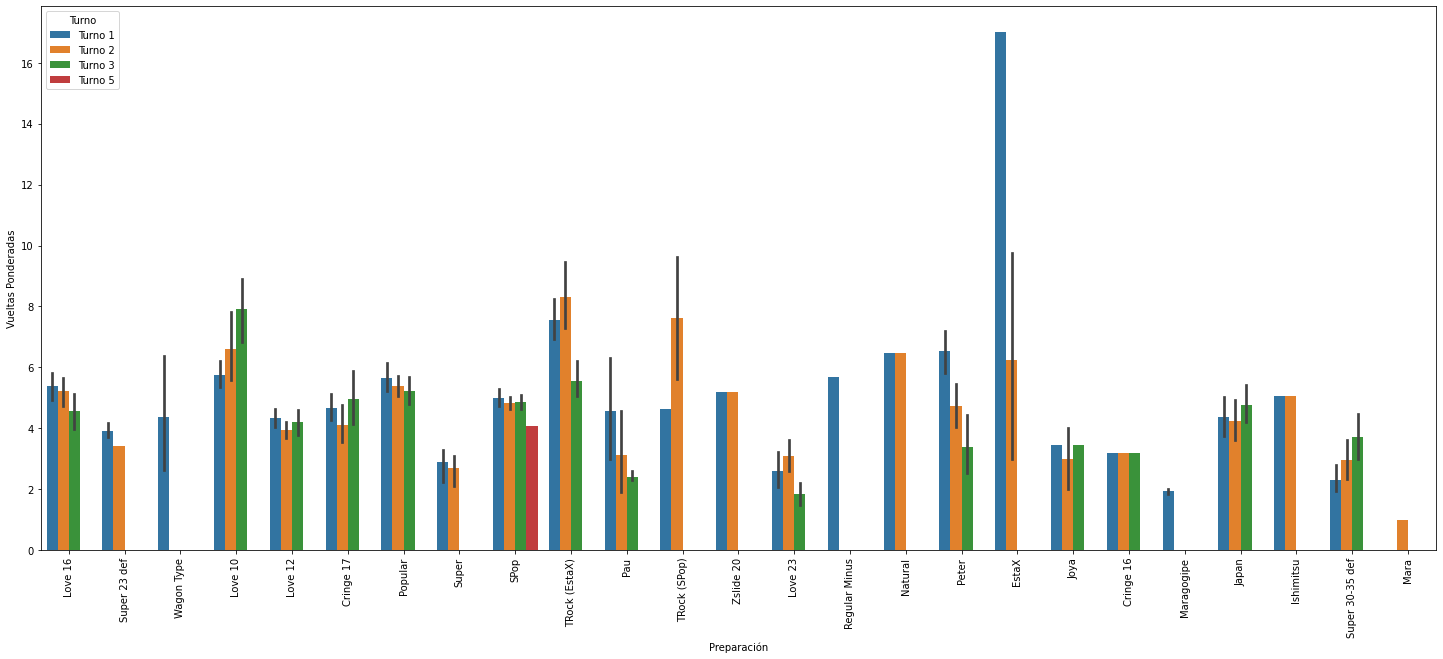

In [ ]:
sns.barplot(data=df, x='Preparación', y='Vueltas Ponderadas', hue='Turno')
plt.xticks(rotation=90)
plt.show()

This means that the variables have a similar distribution by category. Now, we are going to verify if there is a differences between the Operators, recipes and shifts (Night Shift, Dayshift)

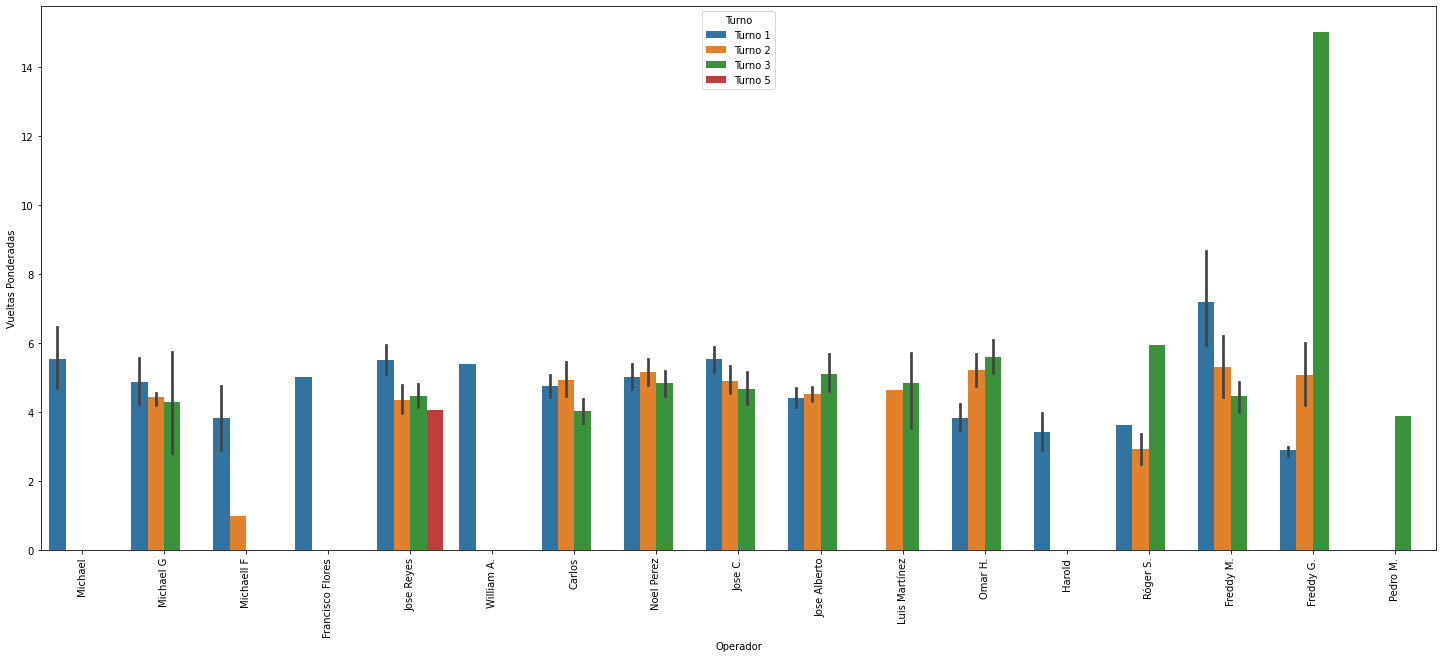

In [ ]:
sns.barplot(data=df, x='Operador', y='Vueltas Ponderadas', hue='Turno')
plt.xticks(rotation=90)
plt.show()

Certainly, the distribution of the Operators are similar. Now, we will verify the relationship between input and the output

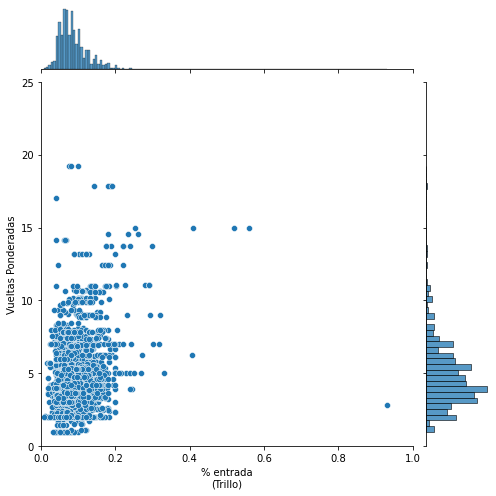

In [ ]:
sns.jointplot(data=df, x='% entrada\n(Trillo)', y='Vueltas Ponderadas',
                  #truncate=False,
                  xlim=(0, 1), ylim=(0, 25),
                  height=7, #kind='reg'
              )

It seems to be a normal distribution in the input and also in the output

## Reordering the Dataframe
Remember that some columns refers to Quality Control analysis. Those columns would not be useful for our model, because the would overfit it.


In [ ]:
columns = df.columns.to_list()
columns[0:11]

['Orden',
 'Preparación',
 'Calidad',
 'QQs Netos',
 'Línea',
 'Fecha',
 'Turno',
 'Analista',
 'Operador',
 'Hora',
 '% entrada\n(Trillo)']

In [ ]:
columns[0:11]

['Orden',
 'Preparación',
 'Calidad',
 'QQs Netos',
 'Línea',
 'Fecha',
 'Turno',
 'Analista',
 'Operador',
 'Hora',
 '% entrada\n(Trillo)']

In [ ]:
df1=df[columns[0:11]+['Vueltas Ponderadas']]
df1.drop(columns=['Orden'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1.rename(columns={'% entrada\n(Trillo)':'%entrada'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Adding Date & Time values. 
At the beginning we thought that the hour could be an useful feature. However, it did not made any difference, so we are going to drop it from the dataset. 

In [ ]:
#df1['Hora']=df1['Hora'].astype(str)
#df1['H']=df1['Hora'].astype(str).apply(lambda x: x.split(':')[0])
#df1['minutes']=df1['Hora'].astype(str).apply(lambda x: x.split(':')[1])
df1.drop(columns=['Hora'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def date_feats(df1):
  df1['month']=df1['Fecha'].dt.month
  df1['year']=df1['Fecha'].dt.year
  df1['day']=df1['Fecha'].dt.day
  df1['week']=df1['Fecha'].dt.week
  df1['weekday']=df1['Fecha'].dt.dayofweek
  df1['yearday']=df1['Fecha'].dt.dayofyear
  df1['quarter']=df1['Fecha'].dt.quarter
  df1['start_month']=df1['Fecha'].dt.is_month_start
  df1['end_month']=df1['Fecha'].dt.is_month_end
  df1['start_month']=df1['start_month'].apply(lambda x: 1 if True else 0)
  df1['end_month']=df1['end_month'].apply(lambda x: 1 if True else 0)
  df1.drop(columns=['Fecha'], inplace=True)
  return df1

In [ ]:
df1= date_feats(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

# Labeling


In [ ]:
df1.head(5)

,Preparación,Calidad,QQs Netos,Línea,Turno,Analista,Operador,%entrada,Vueltas Ponderadas,month,year,day,week,weekday,yearday,quarter,start_month,end_month
0,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.061,7.512796,10,2020,5,41,0,279,4,1,1
1,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.060,7.512796,10,2020,6,41,1,280,4,1,1
2,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.059,7.512796,10,2020,6,41,1,280,4,1,1
3,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.074,7.512796,10,2020,6,41,1,280,4,1,1
4,Love 16,Lift Leve,973.54,Línea 2,Turno 1,Juan S.,Michael,0.081,7.512796,10,2020,7,41,2,281,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,Wagon Type,Lift,428.65,Línea 2,Turno 1,Juan S.,Michaell F,0.076,3.000000,8,2021,27,34,4,239,3,1,1
2344,Wagon Type,Lift,428.65,Línea 2,Turno 1,Juan S.,Michaell F,0.116,3.000000,8,2021,28,34,5,240,3,1,1
2345,Wagon Type,DamLeve,834.91,Línea 2,Turno 1,Juan S.,Michaell F,0.076,2.000000,8,2021,28,34,5,240,3,1,1
2346,Wagon Type,DamLeve,834.91,Línea 2,Turno 1,Juan S.,Michaell F,0.061,2.000000,8,2021,28,34,5,240,3,1,1


Using label encoding for each category

In [ ]:
def label_encoding(df1):
  #Operador labeling
  operador_list =df1['Operador'].unique()
  operador_dict = {operador_list[i]:i for i in range(len(operador_list))}
  df1['Operador']=df1['Operador'].apply(lambda x: operador_dict.get(x))

  #Preparación labeling
  preparacion_list =df1['Preparación'].unique()
  preparacion_dict = {preparacion_list[i]:i for i in range(len(preparacion_list))}
  df1['Preparación']=df1['Preparación'].apply(lambda x: preparacion_dict.get(x))

  #Calidad labels
  calidad_list =df1['Calidad'].unique()
  calidad_dict = {calidad_list[i]:i for i in range(len(calidad_list))}
  df1['Calidad']=df1['Calidad'].apply(lambda x: calidad_dict.get(x))

  #Analista labeling
  analista_list =df1['Analista'].unique()
  analista_dict = {analista_list[i]:i for i in range(len(analista_list))}
  df1['Analista']=df1['Analista'].apply(lambda x: analista_dict.get(x))

  #Turno Labeling
  turno_list =df1['Turno'].unique()
  turno_dict = {turno_list[i]:i for i in range(len(turno_list))}
  df1['Turno']=df1['Turno'].apply(lambda x: turno_dict.get(x))

  #Línea Labeling
  linea_list =df1['Línea'].unique()
  linea_dict = {linea_list[i]:i for i in range(len(linea_list))}
  df1['Línea']=df1['Línea'].apply(lambda x: linea_dict.get(x))

  return df1


In [ ]:
df1 = label_encoding(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
#df1=df1[['Preparación', 'Calidad', 'Línea', 'Turno','Analista','Operador', 'H', 'minutes','month','day','week','weekday','yearday','quarter','start_month','end_month','QQs Netos', '%entrada', 'Vueltas Ponderadas']]
df1=df1[['Preparación', 'Calidad', 'Línea', 'Turno','Analista','Operador','month','day','week','weekday','yearday','quarter','start_month','end_month','QQs Netos', '%entrada', 'Vueltas Ponderadas']]

In [ ]:
df1['Vueltas Ponderadas']=df1['Vueltas Ponderadas'].apply(lambda x: round(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['QQs Netos']=df1['QQs Netos'].apply(lambda x: np.nan if x =='30.10.94' else x) #Registry error. It was found meanwhile training the algorithm
df1['QQs Netos']=df1['QQs Netos'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Verifying the output distribution

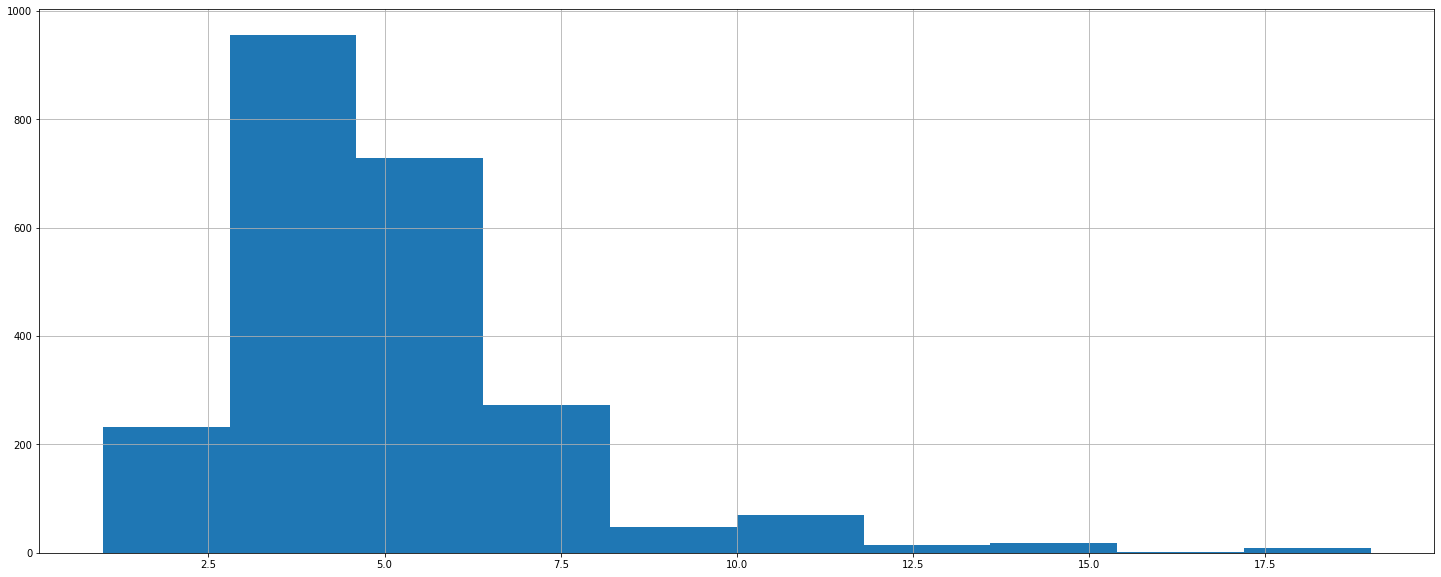

In [ ]:
df1['Vueltas Ponderadas'].hist()

Output beyond 12 can be dropped, because they are considered outliers in the company

In [ ]:
df1['Vueltas Ponderadas']=df1['Vueltas Ponderadas'].apply(lambda x: np.nan if x > 12 else x)
df1.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#sns.pairplot(df1, hue='Vueltas Ponderadas')

# Splitting Test Values

In [ ]:
#Sampling 15% of dataset for testing
df_test=df1.sample(frac=.15)
df1.loc[df_test.index]=np.nan
df_train = df1.dropna()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_test

,Preparación,Calidad,Línea,Turno,Analista,Operador,month,day,week,weekday,yearday,quarter,start_month,end_month,QQs Netos,%entrada,Vueltas Ponderadas
1329,4,0,0,2,9,11,4,16,15,4,106,2,1,1,904.64,0.111,6.0
1982,8,15,0,0,4,14,6,11,23,4,162,2,1,1,1541.53,0.071,8.0
1685,13,0,0,0,4,7,5,21,20,4,141,2,1,1,3363.98,0.043,1.0
776,6,7,1,1,4,9,2,13,6,5,44,1,1,1,1836.02,0.055,5.0
809,8,14,1,1,6,6,2,17,7,2,48,1,1,1,3070.88,0.062,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,8,14,0,2,6,8,2,1,5,0,32,1,1,1,3019.03,0.051,3.0
198,4,4,0,1,4,7,12,23,52,2,358,4,1,1,1917.95,0.090,3.0
1576,21,15,0,2,9,11,5,8,18,5,128,2,1,1,1859.04,0.085,3.0
266,8,4,2,0,4,4,1,2,53,5,2,1,1,1,5835.51,0.096,5.0


In [ ]:
t_labels = df_train['Vueltas Ponderadas']
test_labels =df_test['Vueltas Ponderadas']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_train.drop(columns=['Vueltas Ponderadas']))

In [ ]:
test_scaled =scaler.transform(df_test.drop(columns=['Vueltas Ponderadas']))

In [ ]:
df_scaled=pd.DataFrame(df_scaled, columns=df_train.drop(columns=['Vueltas Ponderadas']).columns)

# Splitting and modeling

For splitting, the train_test_split from sklearn should be useful, then we are going to mix it with Randomized Search CV and Light GBM, to predict the number of cleaning loops required for each reciepe based on the input


In [ ]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_labels, val_labels = train_test_split(df_scaled, t_labels, train_size = 0.85, random_state=42)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

lgb_params = {
              'num_leaves': range(7,100),
              'max_bin': range(50,120),
              'bagging_freq': range(3,20),
              
              'n_estimators': range(80,200),
              'reg_lambda':np.linspace(0,1, num=20),
              'learning_rate': np.linspace(0.001,0.1, num=25),
              'feature_fraction': np.linspace(0.001, 0.8, num=25),
              'max_depth': range(20,400),
              
              #'boosting_type': ['gbdt', 'dart', 'goss']
              }
              

model = lgb.LGBMClassifier()
#cv_model = RandomizedSearchCV(model, lgb_params, cv=10)               
#Once the best params were obtained from Randomized Search CV, it won't be required anymore

In [ ]:
#cv_model.fit(train_data, train_labels, eval_set=(val_data, val_labels), verbose=0)

In [ ]:
#cv_model.best_params_

In [ ]:
#cv_model.best_score_

In [ ]:
best_params={'bagging_freq': 6,
 'feature_fraction': 0.6335416666666668,
 'learning_rate': 0.079375,
 'max_bin': 95,
 'max_depth': 187,
 'n_estimators': 165,
 'num_leaves': 65,
 'reg_lambda': 0.3157894736842105}

In [ ]:
model.set_params(**best_params)
model.fit(train_data, train_labels, eval_set=[(val_data, val_labels),(train_data, train_labels)], verbose=0)

LGBMClassifier(bagging_freq=6, feature_fraction=0.6335416666666668,
               learning_rate=0.079375, max_bin=95, max_depth=187,
               n_estimators=165, num_leaves=65, reg_lambda=0.3157894736842105)

In [ ]:
pred= model.predict(val_data)

## Model Score

With plot_importance from LightGBM, we can verify the ranking of the features

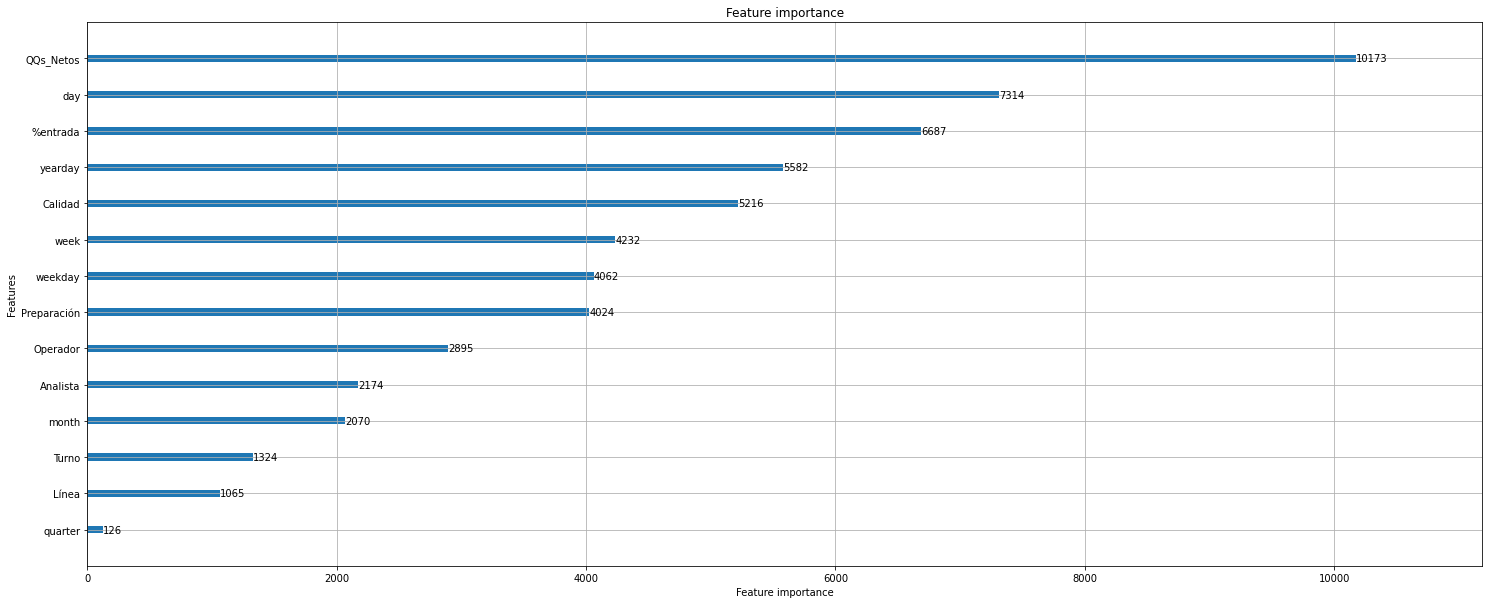

In [ ]:
lgb.plot_importance(model)

The Loss curve seems to be underfitted. Let's check accuracy metrics and model score





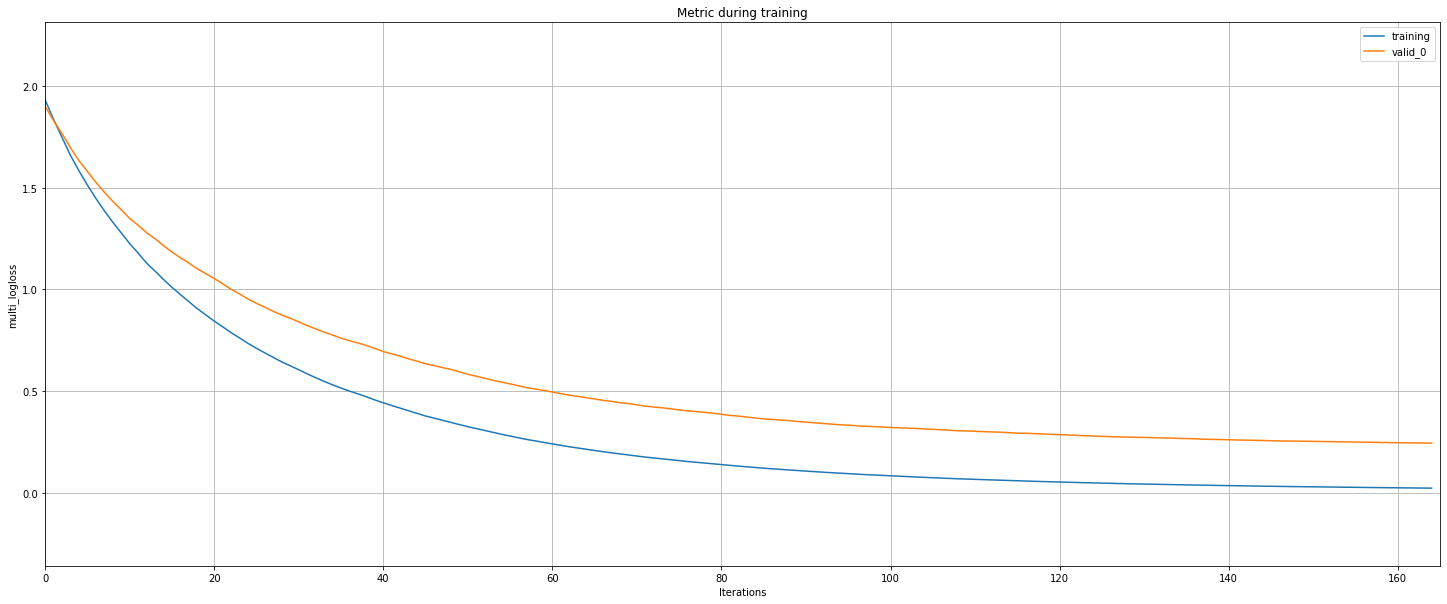

In [ ]:
lgb.plot_metric(model)

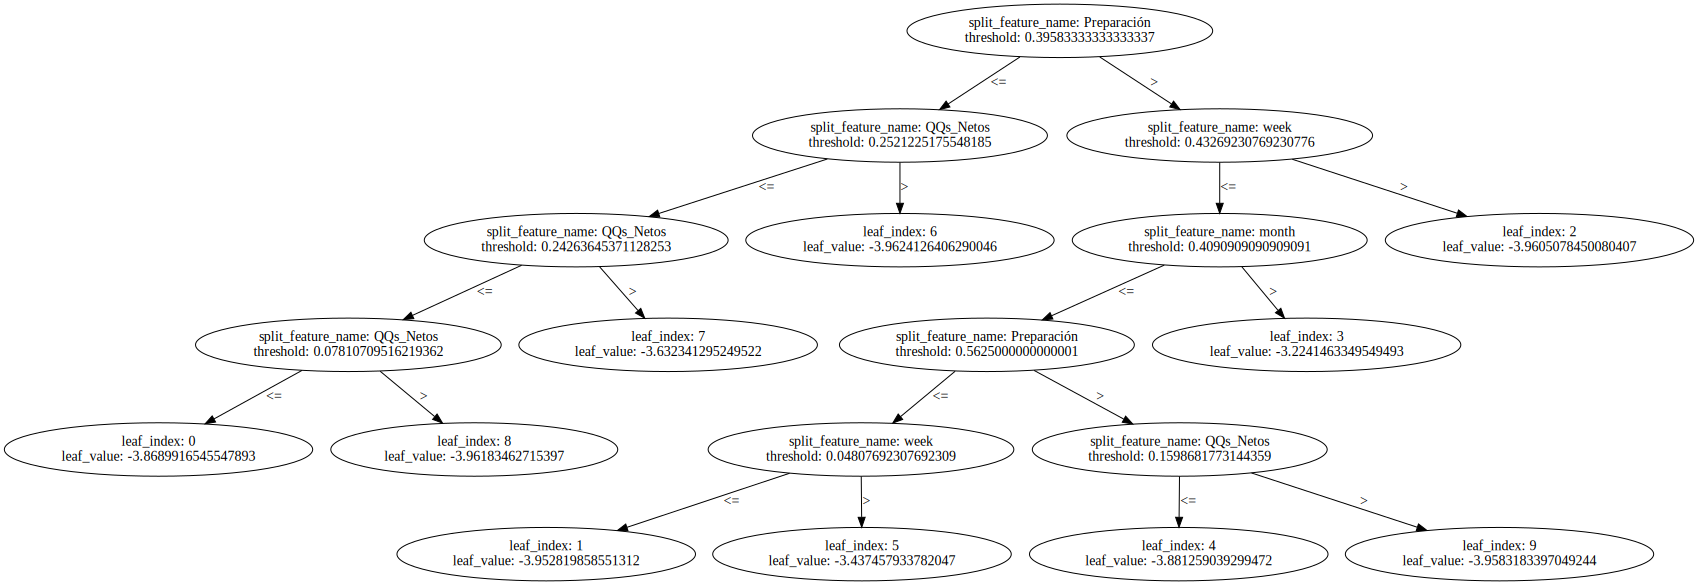

In [ ]:
lgb.create_tree_digraph(model)

In [ ]:
model.score(val_data, val_labels)

0.9355932203389831

93% is a good score (maybe too good to be true). We can also verify others metrics, such as the confusion matrix, accuracy score and f1_score from sklearn

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(val_labels, pred)

array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 54,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 61,  2,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  4, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  1,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2]])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(val_labels, pred)

0.9355932203389831

In [ ]:
from sklearn.metrics import f1_score

f1_score(val_labels, pred, average='weighted')

0.9351479489530575

# Final Test

With the testing data, we are going to test the model

In [ ]:
pred_test = model.predict(test_scaled)

confusion_matrix(test_labels, pred_test)

array([[ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3, 49,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 77,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  8, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  2, 45,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 27,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1]])

In [ ]:
accuracy_score(test_labels, pred_test)

0.9075144508670521

In [ ]:
f1_score(test_labels, pred_test, average='weighted')

0.9077391345217027

Great, the model seems to work. Maybe, we can verify it again with Cross Validation instead of Train-Test split